## Modificando o algoritmo SVM

In [2]:
import pandas as pd

link = 'C:/Users/Kanel/vEnv/trabalho-final/database/Financial-Data.csv'

df = pd.read_csv(link)
df

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [3]:
y = df['e_signed'] # coluna-alvo
x = df[[
    'risk_score', 'amount_requested', 'has_debt', 'income' 
]] # colunas com melhor correlação de Pearson

# x = df -> para usar todas as features

In [4]:
# dataset em 30% para testes
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=2811)

print(f"Train Set: {x_train.shape}, \nTest Set: {x_test.shape}")

Train Set: (12535, 4), 
Test Set: (5373, 4)


In [5]:
from sklearn.svm import SVC

model = SVC()

In [6]:
# -> ajustando o conj. treino
model.fit(x_train, y_train)

# -> mostrar acuracia do treino
predicts = model.predict(x_test)

In [7]:
# resultados do R2 Score
from sklearn import metrics

print(f'Accuracy: {metrics.accuracy_score(y_test, predicts).round(4)}')
print(f'F1-Score: {metrics.f1_score(y_test, predicts).round(4)}')
print(f'Recall: {metrics.recall_score(y_test, predicts).round(4)}')
print(f'Precision: {metrics.precision_score(y_test, predicts).round(4)}')
print(f'EQM: {metrics.mean_squared_error(y_test, predicts).round(4)}')

Accuracy: 0.5503
F1-Score: 0.6842
Recall: 0.9103
Precision: 0.5481
EQM: 0.4497


Realizando modificações

In [7]:
for x in range(1,7):
    model = SVC(C=100, kernel='poly', degree=x)
    model.fit(x_train, y_train)
    print(f'Score treino: {model.score(x_train, y_train).round(4)}')
    predicts = model.predict(x_test)
    print(f'Accuracy: {metrics.accuracy_score(y_test, predicts).round(4)}')
    print(f'F1-Score: {metrics.f1_score(y_test, predicts).round(4)}')
    print(f'Recall: {metrics.recall_score(y_test, predicts).round(4)}')
    print(f'Precision: {metrics.precision_score(y_test, predicts).round(4)}')
    print(f'EQM: {metrics.mean_squared_error(y_test, predicts).round(4)}')
    print('')

Score treino: 0.5396
Accuracy: 0.5351
F1-Score: 0.6971
Recall: 1.0
Precision: 0.5351
EQM: 0.4649

Score treino: 0.5396
Accuracy: 0.5351
F1-Score: 0.6971
Recall: 1.0
Precision: 0.5351
EQM: 0.4649

Score treino: 0.5402
Accuracy: 0.5362
F1-Score: 0.6976
Recall: 1.0
Precision: 0.5357
EQM: 0.4638

Score treino: 0.541
Accuracy: 0.5366
F1-Score: 0.6978
Recall: 1.0
Precision: 0.5359
EQM: 0.4634

Score treino: 0.5417
Accuracy: 0.5384
F1-Score: 0.698
Recall: 0.9969
Precision: 0.537
EQM: 0.4616

Score treino: 0.5429
Accuracy: 0.5416
F1-Score: 0.6981
Recall: 0.9906
Precision: 0.539
EQM: 0.4584



In [8]:
for x in range(1,7):
    model = SVC(C=100, kernel='rbf', degree=x)
    model.fit(x_train, y_train)
    print(f'Score treino: {model.score(x_train, y_train).round(4)}')
    predicts = model.predict(x_test)
    print(f'Accuracy: {metrics.accuracy_score(y_test, predicts).round(4)}')
    print(f'F1-Score: {metrics.f1_score(y_test, predicts).round(4)}')
    print(f'Recall: {metrics.recall_score(y_test, predicts).round(4)}')
    print(f'Precision: {metrics.precision_score(y_test, predicts).round(4)}')
    print(f'EQM: {metrics.mean_squared_error(y_test, predicts).round(4)}')
    print('')

Score treino: 0.5566
Accuracy: 0.5583
F1-Score: 0.6898
Recall: 0.9176
Precision: 0.5526
EQM: 0.4417

Score treino: 0.5566
Accuracy: 0.5583
F1-Score: 0.6898
Recall: 0.9176
Precision: 0.5526
EQM: 0.4417

Score treino: 0.5566
Accuracy: 0.5583
F1-Score: 0.6898
Recall: 0.9176
Precision: 0.5526
EQM: 0.4417

Score treino: 0.5566
Accuracy: 0.5583
F1-Score: 0.6898
Recall: 0.9176
Precision: 0.5526
EQM: 0.4417

Score treino: 0.5566
Accuracy: 0.5583
F1-Score: 0.6898
Recall: 0.9176
Precision: 0.5526
EQM: 0.4417

Score treino: 0.5566
Accuracy: 0.5583
F1-Score: 0.6898
Recall: 0.9176
Precision: 0.5526
EQM: 0.4417



In [9]:
for x in range(1,7):
    model = SVC(C=100, kernel='linear', degree=x, cache_size=2000)
    model.fit(x_train, y_train)
    print(f'Score treino: {model.score(x_train, y_train).round(4)}')
    predicts = model.predict(x_test)
    print(f'Accuracy: {metrics.accuracy_score(y_test, predicts).round(4)}')
    print(f'F1-Score: {metrics.f1_score(y_test, predicts).round(4)}')
    print(f'Recall: {metrics.recall_score(y_test, predicts).round(4)}')
    print(f'Precision: {metrics.precision_score(y_test, predicts).round(4)}')
    print(f'EQM: {metrics.mean_squared_error(y_test, predicts).round(4)}')
    print('')

Score treino: 0.5323
Accuracy: 0.533
F1-Score: 0.6698
Recall: 0.8852
Precision: 0.5387
EQM: 0.467

Score treino: 0.5323
Accuracy: 0.533
F1-Score: 0.6698
Recall: 0.8852
Precision: 0.5387
EQM: 0.467

Score treino: 0.5323
Accuracy: 0.533
F1-Score: 0.6698
Recall: 0.8852
Precision: 0.5387
EQM: 0.467

Score treino: 0.5323
Accuracy: 0.533
F1-Score: 0.6698
Recall: 0.8852
Precision: 0.5387
EQM: 0.467

Score treino: 0.5323
Accuracy: 0.533
F1-Score: 0.6698
Recall: 0.8852
Precision: 0.5387
EQM: 0.467

Score treino: 0.5323
Accuracy: 0.533
F1-Score: 0.6698
Recall: 0.8852
Precision: 0.5387
EQM: 0.467



In [8]:
SVC?


| [C, kernel] | result |
|-------------|--------|
| [0.1, linear] | 0.5312 |
| [0.1, poly] | 0.5351 |
| [0.1, rbf] | 0.5399 |
| [0.1, sigmoid] | 0.4532 |
| [1, linear] | 0.5345 |
| [1, poly] | 0.5351 |
| [1, rbf] | 0.5503 |
| [1, sigmoid] | 0.4530 |


| [C, kernel] | result |
|-------------|--------|
| [10, linear] | 0.5351 |
| [10, poly] | 0.5351 |
| [10, rbf] | 0.5524 |
| [10, sigmoid] | 0.4534 |
| [100, linear] | 0.5330 |
| [100, poly] | 0.5362 |
| [100, rbf] | 0.5583 |
| [100, sigmoid] | 0.4534 |

Usando `poly`

| [C, degree] | result |
|-------------|--------|
| [100, 1] | 0.5351 |
| [100, 2] | 0.5351 |
| [100, 3] | 0.5362 |
| [100, 4] | 0.5366 |
| [100, 5] | 0.5384 |
| [100, 6] | 0.5416 |

Usando `rbf`

| [C, degree] | result |
|-------------|--------|
| [100, 1] | 0.5583 |
| [100, 2] | 0.5583 |
| [100, 3] | 0.5583 |
| [100, 4] | 0.5583 |
| [100, 5] | 0.5583 |
| [100, 6] | 0.5583 |

In [10]:
model = SVC(C=100, cache_size=1000, kernel='poly', degree=6)

In [11]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [12]:
import seaborn as sns

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

              precision    recall  f1-score   support

           0       0.70      0.02      0.05      2498
           1       0.54      0.99      0.70      2875

    accuracy                           0.54      5373
   macro avg       0.62      0.51      0.37      5373
weighted avg       0.61      0.54      0.40      5373

[[  62 2436]
 [  27 2848]]


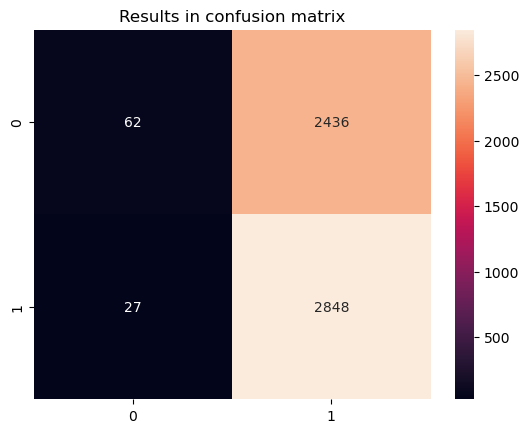

In [14]:
cofMat = confusion_matrix(y_test,y_pred)
sns.heatmap(cofMat, annot=True, fmt="d").set_title("Results in confusion matrix")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))